In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's read the data from the file
df = pd.read_csv('bottle.csv')
df = pd.DataFrame(df)
df.shape

(864863, 74)

In [3]:
#As we can see, the data has myriad rows
#So to reduce the number of rows for our model, we'll use 10% of them
df = df.sample(frac=0.1, random_state = 123)

In [4]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
253342,9726,253343,080.0 080.0,19-5805ST-HY-130-0612-08000800-0028A-3,28,14.44,33.170,5.93,24.683,101.9,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819429,32644,819430,090.0 080.0,20-1101NM-MX-018-0152-09000800-0500A-7,500,5.59,34.199,0.53,26.976,7.5,...,NaN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37319,1206,37320,093.3 060.0,19-5003PT-HY-076-1530-09330600-0500A-7,500,5.76,34.300,0.96,27.035,13.7,...,NaN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792607,31626,792608,076.7 055.0,20-0801JD-MX-029-0822-07670550-0200A-7,200,8.61,34.151,1.38,26.517,21.1,...,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390577,14666,390578,120.0 045.0,19-6601AX-HY-029-2106-12000450-0150A-7,150,11.18,34.193,2.18,26.118,35.2,...,NaN,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Now that those rows are reduced we see that there are a lot of entries with NaN values

#print(df[df.columns[0]].dtype)
#df.dtypes

#Let's try removing them
df.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment


In [6]:
#What!!!!? Every row from our randomly selected 10% data has atleast 1 NaN value

#df.fillna(value=0, inplace=True)

#We need a better approach than substituting every entry with 0
#Let's first remove the columns with "object" 
temp_df=df
for i in temp_df.columns:
    if(df[i].dtype=='object'):
        del df[i]
    
df.shape

(86486, 70)

In [7]:
#As we can see we are now left with 70 columns 

#print(len(df.columns))

#Now, let's replace them with the mean value of their respective columns
for i in df.columns:
    df[i].fillna((df[i].mean()),inplace=True)
    
#print(df[df.columns[0]])

In [8]:
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
253342,9726,253343,28,14.44,33.170,5.93,24.683,101.9,258.45440,10.489243,...,0.447076,0.195642,28,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
819429,32644,819430,500,5.59,34.199,0.53,26.976,7.5,23.04805,10.489243,...,0.447076,0.195642,503,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
37319,1206,37320,500,5.76,34.300,0.96,27.035,13.7,41.74502,10.489243,...,0.447076,0.195642,503,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
792607,31626,792608,200,8.61,34.151,1.38,26.517,21.1,60.03875,10.489243,...,0.447076,0.195642,201,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
390577,14666,390578,150,11.18,34.193,2.18,26.118,35.2,94.88071,10.489243,...,0.447076,0.195642,151,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642


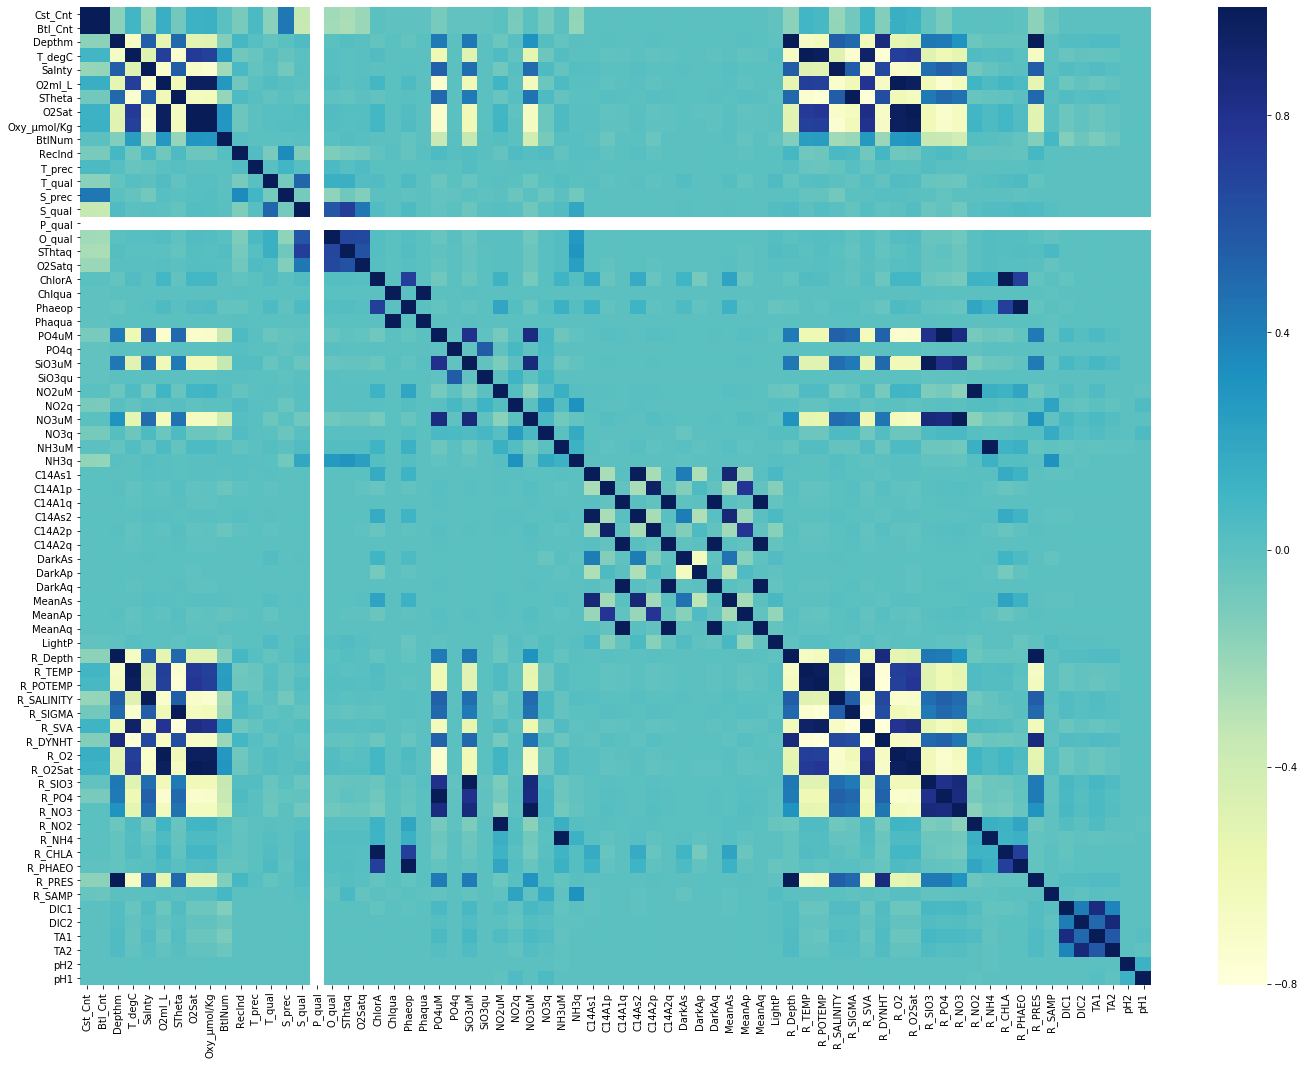

In [9]:
#Boom, all NaN values replaced with mean values

#Plotting a Heatmap now, yes a heatmap for 70 features 
import seaborn as sns
cor = df.corr()
fig = plt.figure(figsize = (24, 18))

#Plotting the heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

In [10]:
#Since we are predicting Salinity of water, let's select the columns which show correlation 
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual',
       'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA',
       'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu',
       'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p',
       'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq',
       'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [11]:
#Selecting the target and feature variables
target='Salnty'
features =['Depthm', 'T_degC','O2ml_L', 'STheta','O2Sat', 'Oxy_µmol/Kg','PO4uM', 'SiO3uM','NH3uM','R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat','R_SIO3', 'R_PO4', 'R_NO3','R_PRES']


In [12]:
x=df[features]
y=df[target]
print(x.shape,y.shape)

(86486, 22) (86486,)


In [13]:
#Splitting them into test and training set with a 3:1 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(x_train.shape,y_train.shape)

(64864, 22) (64864,)


In [14]:
#Hello Linear Regression!
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy*100)


99.9999368428881


In [15]:
#Over 99.99% accuracy, I wonder if I made any mistake or it's just great :)

# Make predictions using the new model
y_pred = clf.predict(x_test)
for i in range(10):
    print('Actual value: {:.3f} Predicted Value: {:.3f}'.format(y_test.values[i],y_pred[i]))


Actual value: 33.620 Predicted Value: 33.620
Actual value: 34.183 Predicted Value: 34.183
Actual value: 33.448 Predicted Value: 33.448
Actual value: 34.250 Predicted Value: 34.250
Actual value: 33.044 Predicted Value: 33.044
Actual value: 33.959 Predicted Value: 33.959
Actual value: 33.454 Predicted Value: 33.454
Actual value: 33.981 Predicted Value: 33.981
Actual value: 33.677 Predicted Value: 33.677
Actual value: 34.043 Predicted Value: 34.043


In [16]:
#As expected, the actual and the predicted values are almost same

#Let's make an interactive visualization of predicted and actual values
trace=go.Scatter(x=y_test.values, y=y_pred,marker=dict(color='red'))

In [17]:
layout = go.Layout(
    title=go.layout.Title(
        text='Predicted Vs Actual Salinity ',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Actual Values',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Predicted Values',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='results')

In [18]:
#Feel free to hover your cursor over the trace line :)